# Optimized GA Analysis

### Imports and Method Definitions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def make_multi_run_df(run_list):
    # get gen column from run with most generations
    max_gen = 0
    for run in run_list:
        temp_gen = run['gen'].iloc[-1]
        if temp_gen > max_gen:
            max_gen = temp_gen
            max_col = pd.DataFrame(run['gen'])

        # make combined df for all runs
    df_multi = max_col.copy()
    run_names = ['A', 'B', 'C', 'D', 'E']

    for count, df in enumerate(run_list):
        run_name = run_names[count]
        df_run = df.copy()

        df_run = df_run[['filename', 'score']]
        df_run = df_run.rename(columns={'filename':'filename_%s' % run_name, 'score':'score_%s' % run_name})
        df_multi = df_multi.join(df_run, how='outer')
        
    return(df_multi)

In [3]:
def make_convergence_df(df_multi, max_or_min):
    # extreme values for each generation found based on ordering of rows inherited from original df's: 
    # within each generation, minimum value is top row / max is bottom row

    df_conv = pd.DataFrame()

    num_gen = df_multi.iloc[df_multi.shape[0]-1,0]
    for x in range(num_gen):
        gen = x+1

        if max_or_min == 'max':
            max_A = df_multi[df_multi['gen']==(gen)]['score_A'].max()
            max_B = df_multi[df_multi['gen']==(gen)]['score_B'].max()
            max_C = df_multi[df_multi['gen']==(gen)]['score_C'].max()
            max_D = df_multi[df_multi['gen']==(gen)]['score_D'].max()
            max_E = df_multi[df_multi['gen']==(gen)]['score_E'].max()
        
            temp_df = pd.DataFrame({'gen':[gen], 'max_A':[max_A], 'max_B':[max_B], 'max_C':[max_C], 'max_D':[max_D], 'max_E':[max_E]})
            df_conv = df_conv.append(temp_df, ignore_index=True)

        elif max_or_min == 'min':
            min_A = df_multi[df_multi['gen']==(gen)]['score_A'].min()
            min_B = df_multi[df_multi['gen']==(gen)]['score_B'].min()
            min_C = df_multi[df_multi['gen']==(gen)]['score_C'].min()
            min_D = df_multi[df_multi['gen']==(gen)]['score_D'].min()
            min_E = df_multi[df_multi['gen']==(gen)]['score_E'].min()
        
            temp_df = pd.DataFrame({'gen':[gen], 'min_A':[min_A], 'min_B':[min_B], 'min_C':[min_C], 'min_D':[min_D], 'min_E':[min_E]})
            df_conv = df_conv.append(temp_df, ignore_index=True)

    return(df_conv)

## Data Processing

### Load data into one multi-run DF per property

In [4]:
polar_a = pd.read_csv('full_files/full_analysis_optimized_GA_polar_A.csv')
polar_b = pd.read_csv('full_files/full_analysis_optimized_GA_polar_B.csv')
polar_c = pd.read_csv('full_files/full_analysis_optimized_GA_polar_C.csv')
polar_d = pd.read_csv('full_files/full_analysis_optimized_GA_polar_D.csv')
polar_e = pd.read_csv('full_files/full_analysis_optimized_GA_polar_E.csv')

polar_runs = [polar_a, polar_b, polar_c, polar_d, polar_e]
df_polar = make_multi_run_df(polar_runs)
df_polar.head()

,gen,filename_A,score_A,filename_B,score_B,filename_C,score_C,filename_D,score_D,filename_E,score_E
0,1,845_470_111111,396.918243,960_1117_011000,346.081320,819_776_000010,0.000000,1150_713_101001,372.680778,1088_92_111010,0.000000
1,1,175_1102_110010,438.401566,819_1066_010011,521.572301,720_1138_011011,0.000000,1093_112_001000,418.326076,405_996_111111,418.863757
2,1,214_1041_010111,512.680436,819_229_001000,528.747412,1120_1048_000010,0.000000,345_371_100011,487.852926,804_438_100111,497.936996
3,1,333_461_001000,545.317380,230_115_000100,588.028942,293_866_011111,445.699025,551_1167_001010,506.598862,705_419_010001,502.260929
4,1,486_322_111010,550.980966,1048_756_010100,607.024576,528_17_000100,497.139747,1090_672_010010,507.125230,1073_705_111011,555.430914


In [5]:
opt_bg_a = pd.read_csv('full_files/full_analysis_optimized_GA_opt_bg_A.csv')
opt_bg_b = pd.read_csv('full_files/full_analysis_optimized_GA_opt_bg_B.csv')
opt_bg_c = pd.read_csv('full_files/full_analysis_optimized_GA_opt_bg_C.csv')
opt_bg_d = pd.read_csv('full_files/full_analysis_optimized_GA_opt_bg_D.csv')
opt_bg_e = pd.read_csv('full_files/full_analysis_optimized_GA_opt_bg_E.csv')

opt_bg_runs = [opt_bg_a, opt_bg_b, opt_bg_c, opt_bg_d, opt_bg_e]
df_opt_bg = make_multi_run_df(opt_bg_runs)
df_opt_bg.head()

,gen,filename_A,score_A,filename_B,score_B,filename_C,score_C,filename_D,score_D,filename_E,score_E
0,1,882_236_000110,1.836,501_806_100100,1.222,122_122_000101,0.615,21_454_111101,1.343,1156_355_010010,1.077
1,1,902_989_100111,1.903,645_500_001111,2.060,1075_199_011100,0.777,455_158_101100,1.661,597_780_100011,1.974
2,1,70_715_101111,1.937,725_327_000101,2.061,542_552_110101,1.407,270_6_000010,1.664,8_284_000011,2.214
3,1,928_288_101111,1.955,1131_868_010100,2.100,728_603_100101,1.755,307_248_111110,1.893,303_751_100011,2.253
4,1,288_126_100001,2.073,1050_1112_110000,2.125,677_811_011100,2.042,507_614_101011,2.034,23_857_111000,2.280


In [6]:
solv_eng_a = pd.read_csv('full_files/full_analysis_optimized_GA_solv_eng_A.csv')
solv_eng_b = pd.read_csv('full_files/full_analysis_optimized_GA_solv_eng_B.csv')
solv_eng_c = pd.read_csv('full_files/full_analysis_optimized_GA_solv_eng_C.csv')
solv_eng_d = pd.read_csv('full_files/full_analysis_optimized_GA_solv_eng_D.csv')
solv_eng_e = pd.read_csv('full_files/full_analysis_optimized_GA_solv_eng_E.csv')

solv_eng_runs = [solv_eng_a, solv_eng_b, solv_eng_c, solv_eng_d, solv_eng_e]
df_solv_eng = make_multi_run_df(solv_eng_runs)
df_solv_eng.head()

,gen,filename_A,score_A,filename_B,score_B,filename_C,score_C,filename_D,score_D,filename_E,score_E
0,1,933_812_000100,-0.244315,220_534_101001,-0.235891,1148_1047_101111,-0.181954,551_1167_001010,0.030173,440_923_111100,0.004500
1,1,887_1007_000001,-0.149485,1048_756_010100,-0.050042,122_122_000101,-0.116347,307_248_111110,0.220918,597_780_100011,0.019817
2,1,1038_1195_011011,-0.067553,501_806_100100,0.109133,763_405_011000,-0.068691,507_614_101011,0.231281,293_215_000110,0.278626
3,1,175_1102_110010,0.250429,68_1172_100010,0.154263,1022_339_111110,0.021425,149_660_010000,0.235175,1172_349_010110,0.381297
4,1,214_1041_010111,0.343559,45_925_101000,0.233091,293_866_011111,0.094782,479_849_010111,0.376457,977_828_011010,0.436182


### Make convergence DFs of extreme value from each generation

In [7]:
df_max_polar = make_convergence_df(df_polar, 'max')
df_min_opt_bg = make_convergence_df(df_opt_bg, 'min')
df_min_solv_eng = make_convergence_df(df_solv_eng, 'min')

## Find Exact Champion Values for Each Run

### Polaribility

In [8]:
print(df_polar.loc[df_polar['score_A'].last_valid_index(), 'score_A'])
print(df_polar.loc[df_polar['score_B'].last_valid_index(), 'score_B'])
print(df_polar.loc[df_polar['score_C'].last_valid_index(), 'score_C'])
print(df_polar.loc[df_polar['score_D'].last_valid_index(), 'score_D'])
print(df_polar.loc[df_polar['score_E'].last_valid_index(), 'score_E'])
print('\n')
print(df_polar.loc[df_polar['score_A'].last_valid_index(), 'filename_A'])
print(df_polar.loc[df_polar['score_B'].last_valid_index(), 'filename_B'])
print(df_polar.loc[df_polar['score_C'].last_valid_index(), 'filename_C'])
print(df_polar.loc[df_polar['score_D'].last_valid_index(), 'filename_D'])
print(df_polar.loc[df_polar['score_E'].last_valid_index(), 'filename_E'])

2918.287293
2918.422993
2596.194669
2911.541216
2596.206827


914_376_111111
367_376_111111
548_409_000000
376_1120_000000
548_544_000000


## Optical Bandgap

In [9]:
print(df_opt_bg.loc[df_opt_bg['score_A'].last_valid_index()-31, 'score_A'])
print(df_opt_bg.loc[df_opt_bg['score_B'].last_valid_index()-31, 'score_B'])
print(df_opt_bg.loc[df_opt_bg['score_C'].last_valid_index()-31, 'score_C'])
print(df_opt_bg.loc[df_opt_bg['score_D'].last_valid_index()-31, 'score_D'])
print(df_opt_bg.loc[df_opt_bg['score_E'].last_valid_index()-31, 'score_E'])


print('\n')

print(df_opt_bg.loc[df_opt_bg['score_A'].last_valid_index()-31, 'filename_A'])
print(df_opt_bg.loc[df_opt_bg['score_B'].last_valid_index()-31, 'filename_B'])
print(df_opt_bg.loc[df_opt_bg['score_C'].last_valid_index()-31, 'filename_C'])
print(df_opt_bg.loc[df_opt_bg['score_D'].last_valid_index()-31, 'filename_D'])
print(df_opt_bg.loc[df_opt_bg['score_E'].last_valid_index()-31, 'filename_E'])

0.024
0.013999999999999999
0.013999999999999999
0.037000000000000005
0.013999999999999999


388_236_111001
353_30_101010
825_273_011011
273_539_110111
515_273_011011


## Solvation Energy

In [10]:
print(df_solv_eng.loc[df_solv_eng['score_A'].last_valid_index()-31, 'score_A'])
print(df_solv_eng.loc[df_solv_eng['score_B'].last_valid_index()-31, 'score_B'])
print(df_solv_eng.loc[df_solv_eng['score_C'].last_valid_index()-31, 'score_C'])
print(df_solv_eng.loc[df_solv_eng['score_D'].last_valid_index()-31, 'score_D'])
print(df_solv_eng.loc[df_solv_eng['score_E'].last_valid_index()-31, 'score_E'])

print('\n')

print(df_solv_eng.loc[df_solv_eng['score_A'].last_valid_index()-31, 'filename_A'])
print(df_solv_eng.loc[df_solv_eng['score_B'].last_valid_index()-31, 'filename_B'])
print(df_solv_eng.loc[df_solv_eng['score_C'].last_valid_index()-31, 'filename_C'])
print(df_solv_eng.loc[df_solv_eng['score_D'].last_valid_index()-31, 'filename_D'])
print(df_solv_eng.loc[df_solv_eng['score_E'].last_valid_index()-31, 'filename_E'])



-0.6160444771199796
-0.631417379653245
-0.5467153254595344
-0.7058910197396541
-0.6578631717494069


653_244_000001
251_534_111110
871_120_111001
106_746_101100
365_621_000111


## Generate Plots

Set global font sizes for plotting

In [11]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


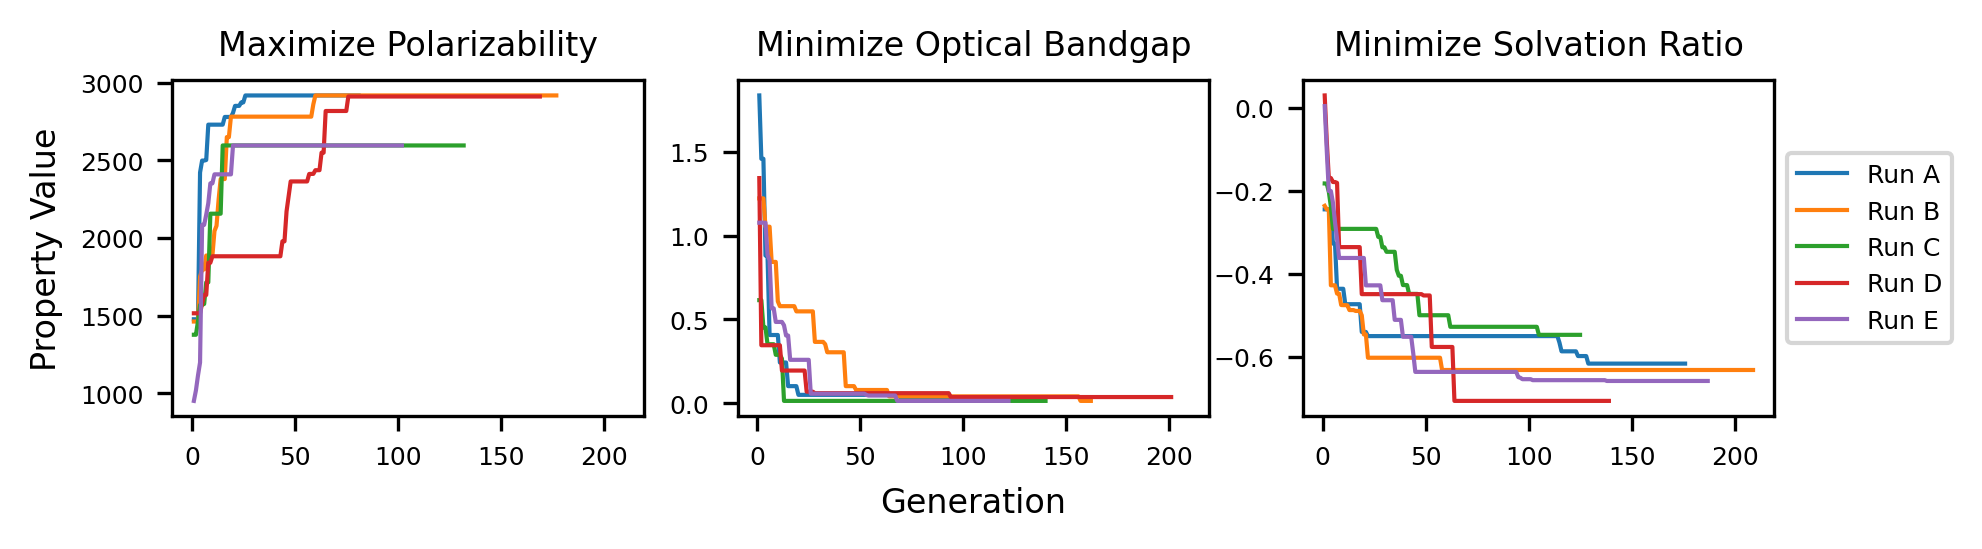

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, dpi=300)

ax1.plot('gen', 'max_A', data=df_max_polar, linestyle='-', marker='', linewidth=1, label='Run A')
ax1.plot('gen', 'max_B', data=df_max_polar, linestyle='-', marker='', linewidth=1, label='Run B')
ax1.plot('gen', 'max_C', data=df_max_polar, linestyle='-', marker='', linewidth=1, label='Run C')
ax1.plot('gen', 'max_D', data=df_max_polar, linestyle='-', marker='', linewidth=1, label='Run D')
ax1.plot('gen', 'max_E', data=df_max_polar, linestyle='-', marker='', linewidth=1, label='Run E')

ax1.set_title('Maximize Polarizability')
ax1.set_ylabel('Property Value')

ax2.plot('gen', 'min_A', data=df_min_opt_bg, linestyle='-', marker='', linewidth=1, label='Run A')
ax2.plot('gen', 'min_B', data=df_min_opt_bg, linestyle='-', marker='', linewidth=1, label='Run B')
ax2.plot('gen', 'min_C', data=df_min_opt_bg, linestyle='-', marker='', linewidth=1, label='Run C')
ax2.plot('gen', 'min_D', data=df_min_opt_bg, linestyle='-', marker='', linewidth=1, label='Run D')
ax2.plot('gen', 'min_E', data=df_min_opt_bg, linestyle='-', marker='', linewidth=1, label='Run E')

ax2.set_title('Minimize Optical Bandgap')
ax2.set_ylabel('')
ax2.set_xlabel('Generation')

ax3.plot('gen', 'min_A', data=df_min_solv_eng, linestyle='-', marker='', linewidth=1, label='Run A')
ax3.plot('gen', 'min_B', data=df_min_solv_eng, linestyle='-', marker='', linewidth=1, label='Run B')
ax3.plot('gen', 'min_C', data=df_min_solv_eng, linestyle='-', marker='', linewidth=1, label='Run C')
ax3.plot('gen', 'min_D', data=df_min_solv_eng, linestyle='-', marker='', linewidth=1, label='Run D')
ax3.plot('gen', 'min_E', data=df_min_solv_eng, linestyle='-', marker='', linewidth=1, label='Run E')

ax3.set_title('Minimize Solvation Ratio')
ax3.set_ylabel('')

top = 0.4
bottom = 0.12
midpoint = (top+bottom)/2

left = 0.11
right = 1
    
plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, wspace=0.2)

# plt.savefig('phase3_convergence.pdf', transparent=False, bbox_inches='tight')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Calculate Elite Polymers (top 10% by Property Value)

In [13]:
# returns 2 dataframes: one of all unique hexamers sorted best to worst and one of top 10% of hexamers sorted best to worst
def make_unique_df(run_list, max_or_min):
    if max_or_min == 'max':
        sort_ascend = False
    elif max_or_min == 'min':
        sort_ascend = True

    df_unique = pd.DataFrame()

    run_names = ['A', 'B', 'C', 'D', 'E']

    for count, df in enumerate(run_list):
        run_name = run_names[count]
        df['run'] = run_name
        df_unique = df_unique.append(df, ignore_index=True)

    df_unique = df_unique.sort_values(by=['score'], ascending=sort_ascend, ignore_index=True)    
    df_unique = df_unique.drop_duplicates(subset=['filename'], ignore_index=True)
    
    ten_perc = int(len(df_unique)*.1)
    df_ten = df_unique[:ten_perc].copy()
    
    return([df_unique, df_ten])

In [14]:
df_unique_polar, df_ten_polar = make_unique_df(polar_runs, 'max')

df_ten_polar.tail()

,gen,filename,score,run
766,107,376_530_000010,2562.386875,D
767,164,185_376_111101,2562.375197,B
768,83,376_123_000010,2561.995130,D
769,77,33_376_110111,2561.875202,A
770,94,376_1163_100000,2561.848997,D


In [15]:
df_unique_opt_bg, df_ten_opt_bg = make_unique_df(opt_bg_runs, 'min')

df_ten_opt_bg.tail()

,gen,filename,score,run
780,106,790_236_011011,0.573,E
781,20,698_539_101111,0.573,D
782,154,273_539_111111,0.573,D
783,51,861_539_011111,0.573,D
784,16,48_539_111001,0.573,D


In [16]:
df_unique_solv_eng, df_ten_solv_eng = make_unique_df(solv_eng_runs, 'min')

df_ten_solv_eng.tail()

,gen,filename,score,run
900,57,1089_1031_000101,-0.399382,E
901,16,658_379_000100,-0.399189,A
902,22,658_240_000100,-0.399130,A
903,106,124_534_111110,-0.399090,B
904,30,522_534_011011,-0.399085,B


In [17]:
# df_ten_polar[['mono1', 'mono2', 'seq']] = df_ten_polar['filename'].str.split('_', expand=True)
# df_ten_polar

## Measure "Coverage"

In [18]:
def get_coverage(run_list, elite_df):
    l = []
    elite_unique = set(elite_df['filename'].unique())

    for run in run_list:
        all_unique = set(run['filename'].unique())
        # find number of elites found in run
        elite_found = len(all_unique.intersection(elite_unique))
        # get % elite coverage
        cov = elite_found/len(elite_unique)*100

        l.append(cov)

    return l
    

In [19]:
polar_cov = get_coverage(polar_runs, df_ten_polar)
opt_bg_cov = get_coverage(opt_bg_runs, df_ten_opt_bg)
solv_eng_cov = get_coverage(solv_eng_runs, df_ten_solv_eng)

cov_data = pd.DataFrame(list(zip(polar_cov, opt_bg_cov, solv_eng_cov)), columns=['Polarizability', 'Optical Bandgap', 'Solvation Ratio'])


In [20]:
cov_data

,Polarizability,Optical Bandgap,Solvation Ratio
0,14.137484,9.044586,44.309392
1,39.559014,13.630573,29.613260
2,9.079118,17.070064,5.635359
3,36.835279,42.802548,2.099448
4,0.907912,17.579618,18.342541


In [24]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title\

plt.rcParams['figure.dpi'] = 300

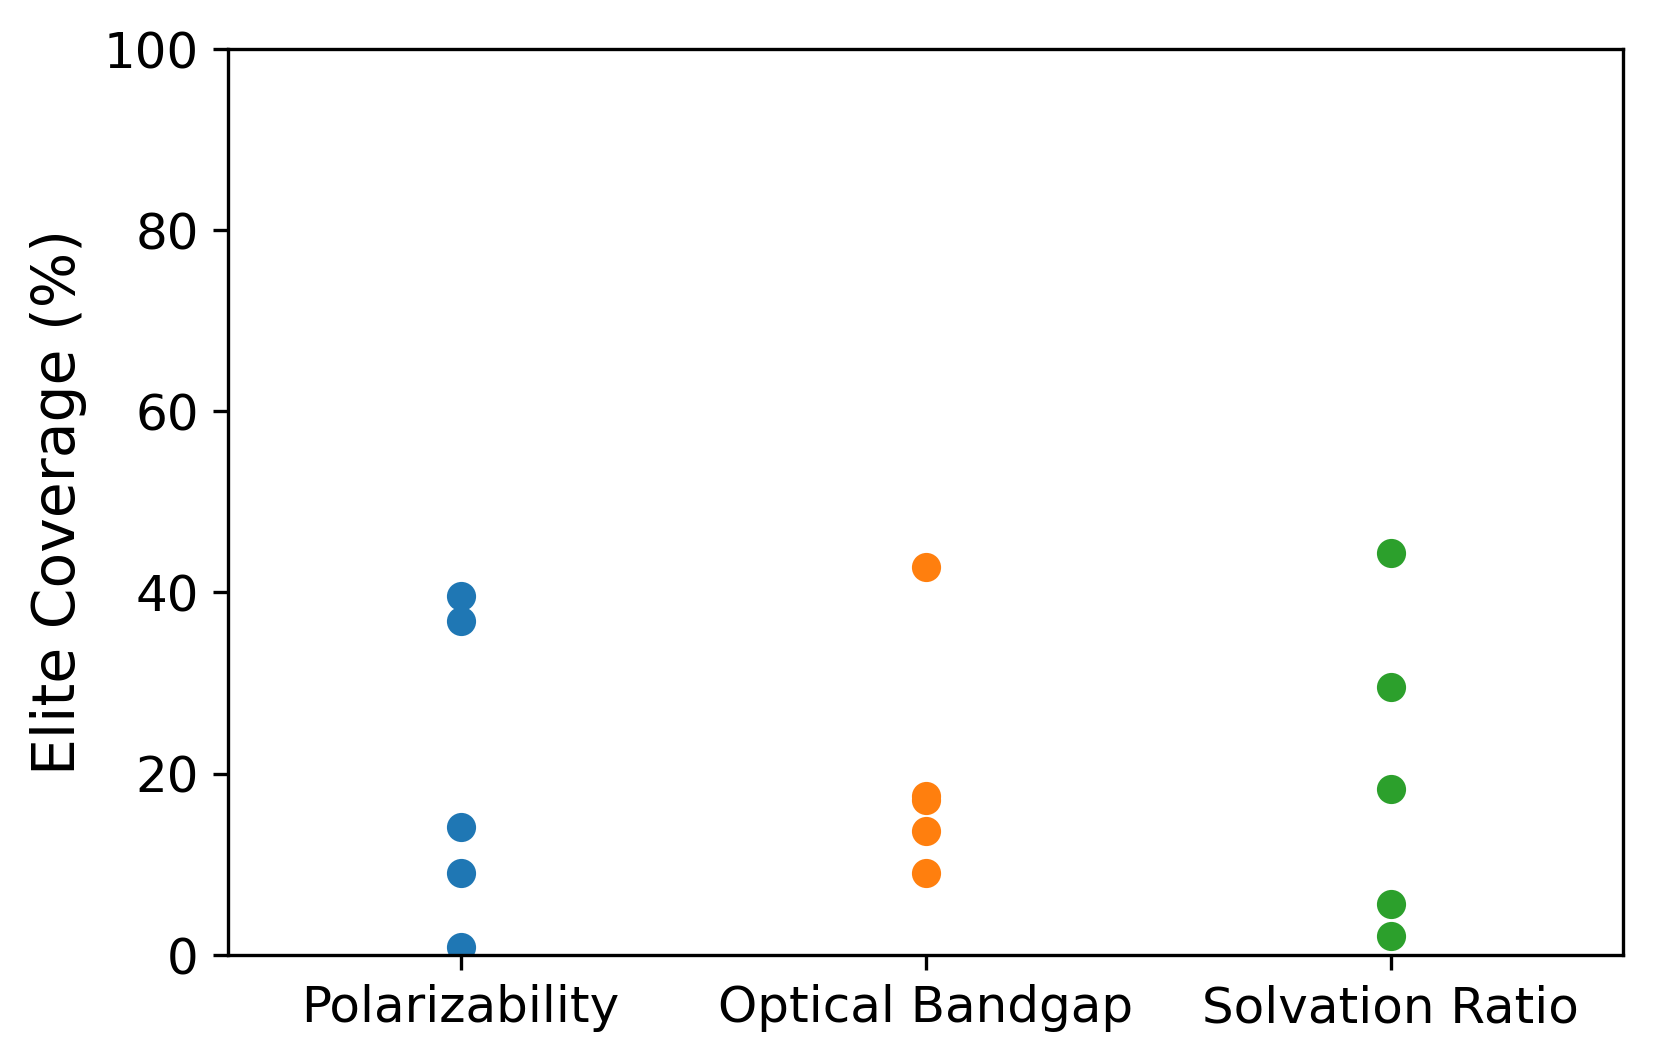

In [25]:
ax = plt.subplots()

plt.scatter(np.full((1, 5), 1), cov_data['Polarizability'], color ='C0', label = 'Polarizability')
plt.scatter(np.full((1, 5), 2), cov_data['Optical Bandgap'], color ='C1', label = 'Optical Bandgap')
plt.scatter(np.full((1, 5), 3), cov_data['Solvation Ratio'], color ='C2', label = 'Optical Bandgap')
plt.ylabel('Elite Coverage (%)')
# plt.xlabel('Property')

plt.ylim(0, 100)
plt.xlim(0.5, 3.5)
plt.xticks([1, 2, 3], ['Polarizability', 'Optical Bandgap', 'Solvation Ratio'])

# plt.savefig('phase3_elite_coverage.pdf', transparent=False, bbox_inches='tight')

plt.show()

## Make Monomer & Sequence Plots

In [37]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title\

plt.rcParams['figure.dpi'] = 300

In [31]:
# helper function for top_ten
# takes any dataframe with col: filename
# returns new dataframe with additional cols: mono1, mono2, seq

def split_filename(df):
    df2 = df.copy()

    new = df2['filename'].str.split('_', expand=True)
    df2['mono1'] = new[0]
    df2['mono2'] = new[1]
    df2['seq'] = new[2]
    
    return df2

In [32]:
# takes any dataframe with cols: mono1, mono2, seq
# returns list of 2 new dataframes with cols: [x_mono, x_mono_count, x_mono_perc] and [x_seq, x_seq_count, x_seq_perc] 
# where x is specified df_name

# removes any 'false' monomer instances in homopolymers (e.g. mono1 with seq '111111')

def get_counts(df):

    # split filename column
    df_split = split_filename(df)
    
    # replace 'false' monomer instances in homopolymers (e.g. mono1 with seq '111111') with 'x'
    df_split.loc[df_split['seq'].eq('000000'), 'mono1'] = 'x'
    df_split.loc[df_split['seq'].eq('111111'), 'mono2'] = 'x'

    # make series objects of each part of filename with accompanying counts
    # note that both monomer columns are combined before creating series with value counts
    count_mono = df_split[['mono1', 'mono2']].unstack().reset_index(drop=True).value_counts()
    count_seq = df_split['seq'].value_counts()
    
    # make series objects into dataframes and rename columns appropriately
    count_mono = pd.DataFrame(count_mono.reset_index())
    count_mono.columns = ['mono', 'mono_count']

    count_seq = pd.DataFrame(count_seq.reset_index())
    count_seq.columns = ['seq', 'seq_count']
    
    # remove monomer 'x' row from dataframe
    count_mono = count_mono[count_mono['mono'] != 'x'].reset_index(drop=True)
    
    # make percentage column in each dataframe  
    count_mono['mono_perc'] = count_mono['mono_count']/count_mono['mono_count'].sum()*100
    count_seq['seq_perc'] = count_seq['seq_count']/count_seq['seq_count'].sum()*100

    return [count_mono, count_seq]  

In [33]:
polar_mono, polar_seq = get_counts(df_ten_polar)
opt_bg_mono, opt_bg_seq = get_counts(df_ten_opt_bg)
solv_eng_mono, solv_eng_seq = get_counts(df_ten_solv_eng)

/ihome/ghutchison/dch45/.virtualenvs/dch_dev/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/ihome/ghutchison/dch45/.virtualenvs/dch_dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/ihome/ghutchison/dch45/.virtualenvs/dch_dev/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


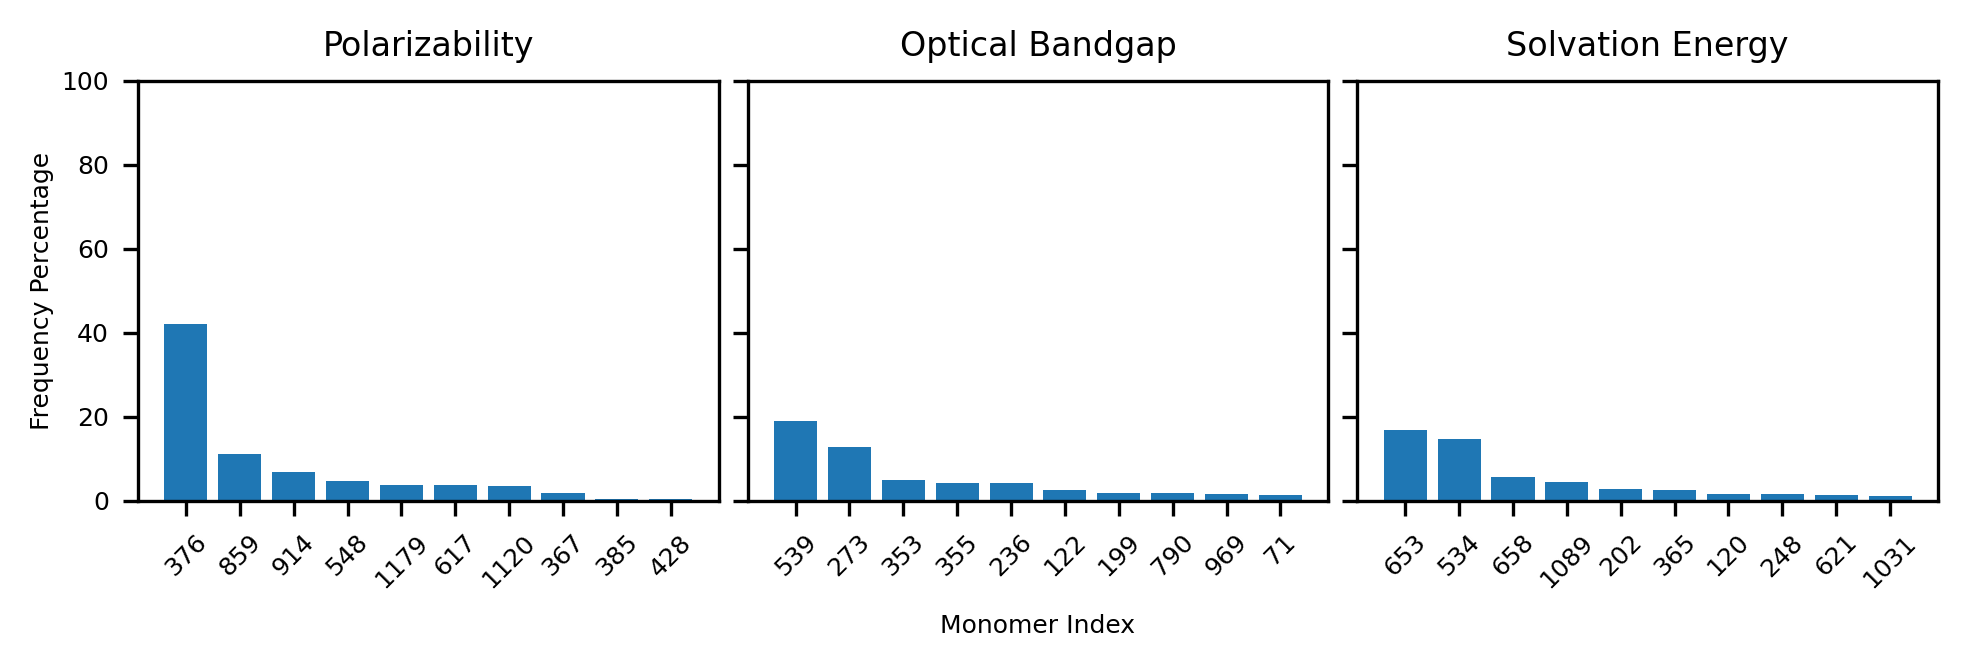

In [38]:
fig, axs = plt.subplots(1, 3, sharey=True, dpi=300)

rot=45
wt='bold'

plt.rcParams["font.weight"] = 'regular'

axs[0].bar('mono', 'mono_perc', data=polar_mono[:10])
axs[0].set_title('Polarizability')
axs[0].set_xticklabels(polar_mono['mono'], rotation=rot)
axs[0].set(ylim=(0, 100))

# axs[0].grid(alpha=0.5)
# axs[0].set_axisbelow(True)

axs[1].bar('mono', 'mono_perc', data=opt_bg_mono[:10])
axs[1].set_title('Optical Bandgap')
axs[1].set_xticklabels(opt_bg_mono['mono'], rotation=rot)

# axs[1].grid(alpha=0.5)
# axs[1].set_axisbelow(True)

for tic in axs[1].yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

axs[2].bar('mono', 'mono_perc', data=solv_eng_mono[:10])
axs[2].set_title('Solvation Energy')
axs[2].set_xticklabels(solv_eng_mono['mono'], rotation=rot)

# axs[2].grid(alpha=0.5)
# axs[2].set_axisbelow(True)

for tic in axs[2].yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

top = 0.5
bottom = 0.15
left = 0
right = 1

fig.text((left+right)/2, 0.04,'Monomer Index', ha='center')
fig.text(-0.06, (top+bottom)/2,'Frequency Percentage', va='center', rotation='vertical')

plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.55, wspace=0.05)

# plt.savefig('top_monomers.png', transparent=False, bbox_inches='tight')

plt.show()

/ihome/ghutchison/dch45/.virtualenvs/dch_dev/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/ihome/ghutchison/dch45/.virtualenvs/dch_dev/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/ihome/ghutchison/dch45/.virtualenvs/dch_dev/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


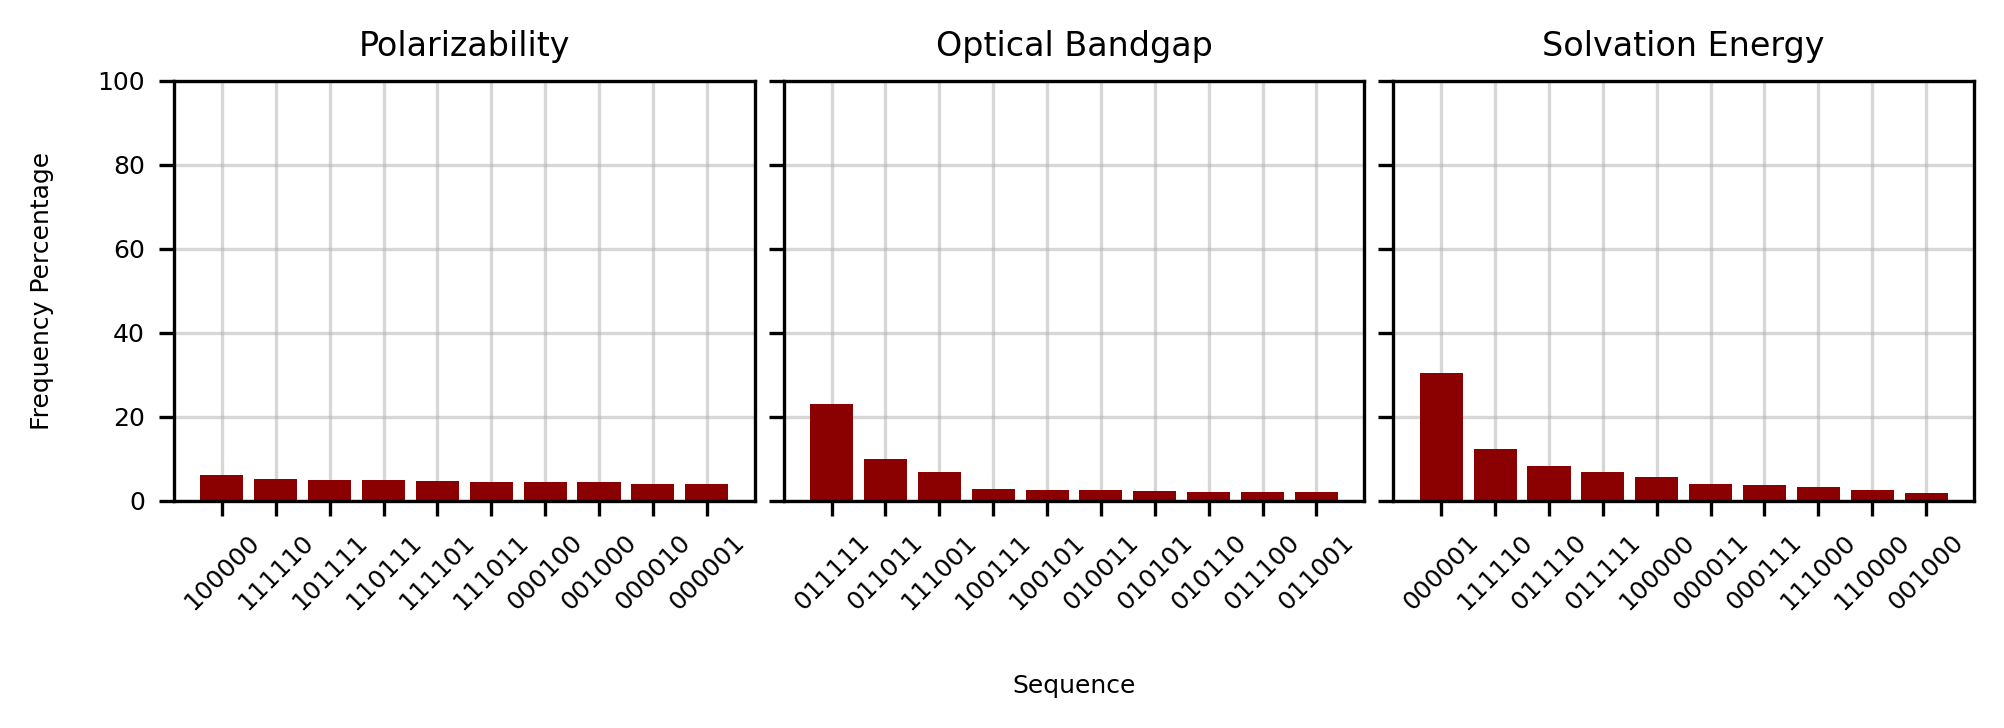

In [39]:
fig, axs = plt.subplots(1, 3, sharey=True, dpi=300)

rot=45
wt='bold'
clr = 'darkred'

plt.rcParams["font.weight"] = 'regular'

axs[0].bar('seq', 'seq_perc', data=polar_seq[:10], color=clr)
axs[0].set_title('Polarizability')
axs[0].set_xticklabels(polar_seq['seq'], rotation=rot)
axs[0].set(ylim=(0, 100))

axs[0].grid(alpha=0.5)
axs[0].set_axisbelow(True)

axs[1].bar('seq', 'seq_perc', data=opt_bg_seq[:10], color=clr)
axs[1].set_title('Optical Bandgap')
axs[1].set_xticklabels(opt_bg_seq['seq'], rotation=rot)

axs[1].grid(alpha=0.5)
axs[1].set_axisbelow(True)

for tic in axs[1].yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

axs[2].bar('seq', 'seq_perc', data=solv_eng_seq[:10], color=clr)
axs[2].set_title('Solvation Energy')
axs[2].set_xticklabels(solv_eng_seq['seq'], rotation=rot)

axs[2].grid(alpha=0.5)
axs[2].set_axisbelow(True)

for tic in axs[2].yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    
top = 0.5
bottom = 0.15
left = 0
right = 1

fig.text((left+right)/2, -0.01,'Sequence', ha='center')
fig.text(-0.08, (top+bottom)/2,'Frequency Percentage', va='center', rotation='vertical')

plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.55, wspace=0.05)

# plt.savefig('top_sequences.pdf', transparent=False, bbox_inches='tight')
plt.show()
